In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import folium
from sqlalchemy import create_engine
from shapely.geometry import shape
from io import BytesIO
import base64

from dotenv import load_dotenv
import os
import json

# .env 파일을 찾아 환경 변수로 로드
load_dotenv()

# 환경 변수 가져오기
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ▶️ MySQL 연결
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")


In [4]:
query1 = """
DESCRIBE seoul_animal_trust_facility
"""
query2 = """
SHOW tables
"""
# pd.read_sql(query1, engine)
pd.read_sql(query2, engine)

,Tables_in_eda
0,animal_beauty_business
1,animal_hospital_registry
2,animal_pharmacy_registry
3,companion_animal_registration
4,korea_urban_park_info
5,per_capita_park_area
6,pollution_emission_facility
7,seoul_abandoned_animal_status
8,seoul_abandonment_statistics
9,seoul_animal_hospital


In [5]:
# ▶️ seoul_animal_trust_facility 등록 데이터 가져오기
query = """
SELECT *
FROM seoul_animal_trust_facility
"""
df = pd.read_sql(query, engine)
df

,id,service_name_open,service_id_open,open_gov_code,mgmt_num,licensg_de,licensg_cncl_de,status_code,status_name,detail_status_code,...,data_update_type,data_update_de,category_name,x,y,business_division_name,business_detail_division_name,right_holder_serial,total_personnel,created_at
0,1,동물위탁관리업,02_03_10_P,3980000,398000004820250004,2025-06-30,None,1,영업/정상,0,...,I,2025-07-02,None,212213.694217,453696.563171,동물위탁관리업,동물위탁관리업,000,0,2025-07-03 11:20:39
1,2,동물위탁관리업,02_03_10_P,3560000,356000004820250013,2025-06-30,None,1,영업/정상,0,...,I,2025-07-02,None,NaN,NaN,동물위탁관리업,동물위탁관리업,000,0,2025-07-03 11:20:39
2,3,동물위탁관리업,02_03_10_P,4060000,406000004820250008,2025-06-30,None,1,영업/정상,0,...,I,2025-07-02,None,180758.166706,484415.484683,동물위탁관리업,동물위탁관리업,000,0,2025-07-03 11:20:39
3,4,동물위탁관리업,02_03_10_P,3300000,330000004820250006,2025-06-30,None,1,영업/정상,0,...,I,2025-07-02,None,389022.953541,192093.055902,동물위탁관리업,동물위탁관리업,L00,0,2025-07-03 11:20:39
4,5,동물위탁관리업,02_03_10_P,5080000,508000004820250005,2025-06-30,None,1,영업/정상,0,...,I,2025-07-02,None,328230.630756,291511.528724,동물위탁관리업,동물위탁관리업,000,0,2025-07-03 11:20:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,9113,동물위탁관리업,02_03_10_P,5180000,518000004820180001,2018-04-25,None,4,취소/말소/만료/정지/중지,4,...,I,2022-07-02,None,409048.494732,341275.345718,동물위탁관리업,동물위탁관리업,000,0,2025-07-03 11:21:31
9113,9114,동물위탁관리업,02_03_10_P,3520000,352000004820180003,2018-04-17,None,4,취소/말소/만료/정지/중지,4,...,I,2022-07-02,None,171670.298144,434884.849576,동물위탁관리업,동물위탁관리업,000,0,2025-07-03 11:21:31
9114,9115,동물위탁관리업,02_03_10_P,4181000,418000004820180008,2018-04-10,None,4,취소/말소/만료/정지/중지,4,...,U,2023-07-08,None,265204.058378,486592.320627,동물위탁관리업,동물위탁관리업,000,0,2025-07-03 11:21:31
9115,9116,동물위탁관리업,02_03_10_P,3560000,356000004820180004,2018-04-09,None,4,취소/말소/만료/정지/중지,4,...,U,2025-02-16,None,169954.955000,447670.330000,동물위탁관리업,동물위탁관리업,000,0,2025-07-03 11:21:31


In [ ]:

# ▶️ 서울 동물위탁관리업 관련 인허가 정보 가져오기
  # 영업/정상 : 필터링
  # 서울특별시 : 지역으로 필터링
  
query = """
SELECT *
FROM seoul_animal_trust_facility
WHERE (status_name LIKE '영업/정상') AND (jibun_address LIKE '서울특별시%%')
"""
df = pd.read_sql(query, engine)
df

,id,service_name_open,service_id_open,open_gov_code,mgmt_num,licensg_de,licensg_cncl_de,status_code,status_name,detail_status_code,...,data_update_type,data_update_de,category_name,x,y,business_type_name,business_type_detail,right_holder_serial,total_personnel,created_at
0,83,동물약국,02_03_02_P,3140000,314000001120150005,2015-07-07,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,185494.645272,447737.318006,동물약국,None,000,NaN,2025-07-03 11:08:05
1,84,동물약국,02_03_02_P,3030000,303000001120140003,2014-11-17,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,202527.370519,450941.849941,동물약국,None,000,NaN,2025-07-03 11:08:05
2,85,동물약국,02_03_02_P,3030000,303000001120150001,2015-01-09,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,204712.095250,448359.934294,동물약국,None,000,NaN,2025-07-03 11:08:05
3,86,동물약국,02_03_02_P,3030000,303000001120150004,2015-08-12,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,204788.453049,448470.237859,동물약국,None,000,NaN,2025-07-03 11:08:05
4,87,동물약국,02_03_02_P,3030000,303000001120150005,2015-08-21,None,1,영업/정상,0,...,I,2018-08-31 23:59:59,None,202401.066045,451809.190992,동물약국,None,000,NaN,2025-07-03 11:08:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,12717,동물약국,02_03_02_P,3150000,315000001120240025,2024-12-02,None,1,영업/정상,0,...,I,2024-12-04 00:11:57,None,186386.587594,447781.141806,동물약국,None,000,0.0,2025-07-03 11:13:58
2630,12720,동물약국,02_03_02_P,3150000,315000001120240026,2024-12-02,None,1,영업/정상,0,...,I,2024-12-04 00:11:57,None,188612.842595,449897.366377,동물약국,None,000,0.0,2025-07-03 11:13:58
2631,12721,동물약국,02_03_02_P,3220000,322000001120240058,2024-12-02,None,1,영업/정상,0,...,I,2024-12-04 00:11:57,None,201543.962547,446856.814680,동물약국,None,000,0.0,2025-07-03 11:13:58
2632,12722,동물약국,02_03_02_P,3220000,322000001120240059,2024-12-02,None,1,영업/정상,0,...,I,2024-12-04 00:11:57,None,203092.721986,442550.634568,동물약국,None,000,0.0,2025-07-03 11:13:58


In [6]:
# 구 이름 추출 방법 1: 문자열 분할
df['district'] = df['jibun_address'].str.split(' ').str[2]

# 구 이름 추출 방법 2: 정규표현식 사용
import re
df['district'] = df['jibun_address'].str.extract(r'서울특별시 ([가-힣]+구)')

# 구별 개수 집계
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'animal_trust_count']
district_counts = district_counts.sort_values('animal_trust_count', ascending=False)

print(district_counts)

   district  animal_trust_count
0       강남구                 156
1       송파구                 127
2       강서구                 102
3       서초구                  70
4       강동구                  55
5       관악구                  54
6       중랑구                  53
7       양천구                  52
8       마포구                  51
9       은평구                  47
10     동대문구                  45
11      광진구                  43
12      성동구                  41
13      용산구                  41
14      노원구                  41
15      도봉구                  39
16     영등포구                  39
17     서대문구                  36
18      강북구                  35
19      성북구                  34
20      금천구                  30
21      구로구                  23
22      동작구                  21
23       중구                  12
24      종로구                  11


/home/park/eda-repo-3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


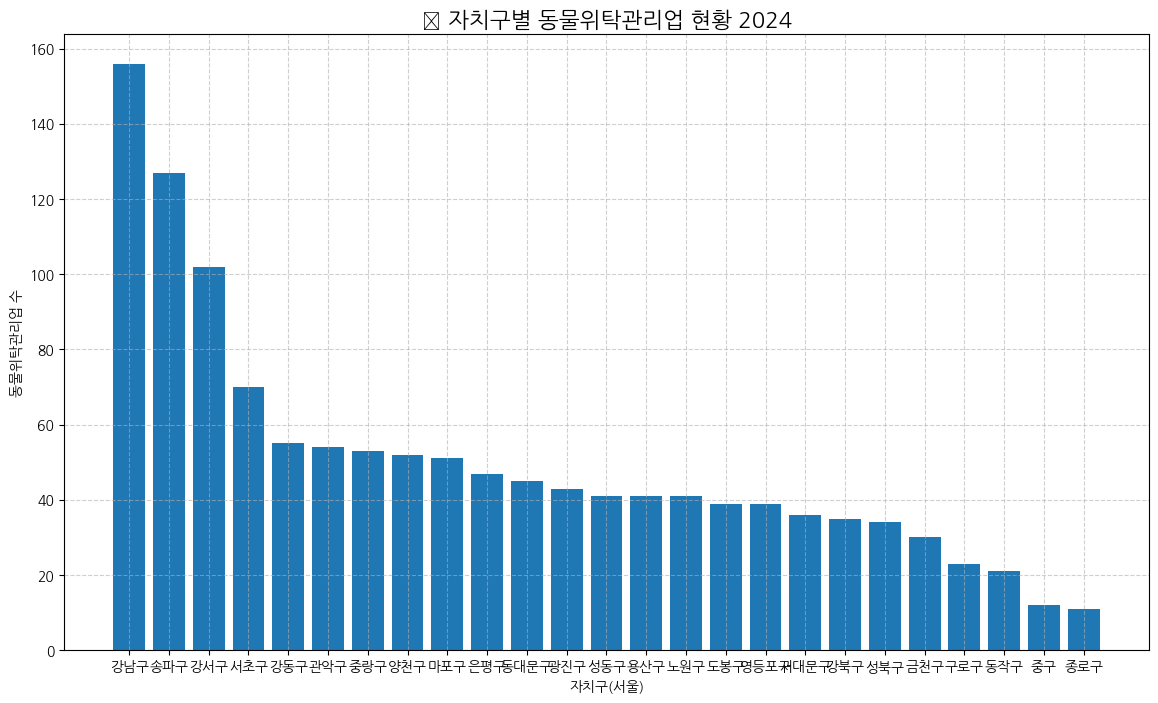

In [7]:
# ▶️ 시각화 (자치구별 동물위탁관리업 추이)
plt.figure(figsize=(14, 8))
plt.bar(district_counts['district'], district_counts['animal_trust_count'])
plt.title("✅ 자치구별 동물위탁관리업 현황 2024", fontsize=16)
plt.xlabel("자치구(서울)")
plt.ylabel("동물위탁관리업 수")
plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout()
plt.show()